<a href="https://colab.research.google.com/github/leandrolaune/CRUD-tabela-de-produtos-Python-SQL/blob/master/Classifica%C3%A7%C3%A3o_de_folhas_de_milho_com_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando deeplake

In [ ]:
pip install "deeplake<4"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.7/618.7 kB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.2 MB/s eta 

## Importando bibliotecas, carregando dataset e preparando dados

In [ ]:
# Importar bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import deeplake
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar o dataset do Deep Lake
ds = deeplake.load('hub://activeloop/plantvillage-without-augmentation')

# Nomear as classes
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
               'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
               'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot',
               'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
               'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
               'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
               'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew',
               'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight',
               'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
               'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# Definir as classes de interesse
selected_classes = ['Corn___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
                    'Corn___Northern_Leaf_Blight', 'Corn___Common_rust']
selected_indices = [class_names.index(cls) for cls in selected_classes]

# Filtrar as imagens e os rótulos das classes selecionadas
filtered_images = []
filtered_labels = []

# Contar o número de imagens por classe
class_counts = {cls: 0 for cls in selected_indices}

for i in range(len(ds['images'])):
    label = ds['labels'][i].numpy()[0]
    if label in selected_indices and class_counts[label] < 500:  # Ajuste o número conforme necessário
        filtered_images.append(ds['images'][i].numpy())
        filtered_labels.append(selected_indices.index(label))
        class_counts[label] += 1

# Converter para arrays do NumPy
filtered_images = np.array(filtered_images)
filtered_labels = np.array(filtered_labels)

/usr/local/lib/python3.10/dist-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.0.0) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/plantvillage-without-augmentation



\

hub://activeloop/plantvillage-without-augmentation loaded successfully.



/usr/local/lib/python3.10/dist-packages/deeplake/core/tensor.py:719: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


##  Divisão dos dados em treino, validação e teste

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

# Supondo que filtered_images e filtered_labels já tenham sido definidos anteriormente
# Função para garantir que todas as classes estão presentes nos conjuntos
def split_data(images, labels, train_size, val_size, test_size):
    strat_split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

    # Divisão inicial: treino e teste
    for train_idx, test_idx in strat_split.split(images, labels):
        train_images, test_images = images[train_idx], images[test_idx]
        train_labels, test_labels = labels[train_idx], labels[test_idx]

    # Divisão do treino em treino e validação
    strat_split_train_val = StratifiedShuffleSplit(n_splits=1, test_size=val_size/(1-test_size), random_state=42)
    for train_idx, val_idx in strat_split_train_val.split(train_images, train_labels):
        final_train_images, val_images = train_images[train_idx], train_images[val_idx]
        final_train_labels, val_labels = train_labels[train_idx], train_labels[val_idx]

    return final_train_images, val_images, test_images, final_train_labels, val_labels, test_labels

# Dividir os dados em 80% treino e 20% teste e garantir representação das classes
train_images, val_images, test_images, train_labels, val_labels, test_labels = split_data(
    filtered_images, filtered_labels, train_size=0.8, val_size=0.2, test_size=0.2)

# Verificar a quantidade de amostras por classe para garantir a representação correta
unique_train_labels, train_counts = np.unique(train_labels, return_counts=True)
unique_val_labels, val_counts = np.unique(val_labels, return_counts=True)
unique_test_labels, test_counts = np.unique(test_labels, return_counts=True)

print('Amostras por classe no treino:', dict(zip(unique_train_labels, train_counts)))
print('Amostras por classe na validação:', dict(zip(unique_val_labels, val_counts)))
print('Amostras por classe no teste:', dict(zip(unique_test_labels, test_counts)))

Amostras por classe no treino: {0: 300, 1: 267, 2: 300, 3: 300}
Amostras por classe na validação: {0: 100, 1: 89, 2: 100, 3: 100}
Amostras por classe no teste: {0: 100, 1: 90, 2: 100, 3: 100}


## Definindo a arquitetura da CNN e compilando o modelo

In [ ]:
# Definir a arquitetura da CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),  # Ajuste o tamanho da imagem conforme necessário
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes no total
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

## Treinando a CNN com callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Callback para salvar o melhor modelo durante o treinamento
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Treinamento por 20 épocas completas
history = model.fit(train_images, train_labels,
                    epochs=20,  # Treinar por 20 épocas
                    validation_data=(val_images, val_labels),
                    callbacks=[checkpoint])


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 27s 476ms/step - accuracy: 0.5089 - loss: 312.7827 - val_accuracy: 0.9512 - val_loss: 0.1695
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9655 - loss: 0.1100 - val_accuracy: 0.9666 - val_loss: 0.0796
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9874 - loss: 0.0349 - val_accuracy: 0.9769 - val_loss: 0.0569
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9962 - loss: 0.0212 - val_accuracy: 0.9871 - val_loss: 0.0735
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9959 - loss: 0.0109 - val_accuracy: 0.9923 - val_loss: 0.0298
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9962 - loss: 0.0139 - val_accuracy: 0.9794 - val_loss: 0.0608
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9920 - loss: 0.0212 - val_accuracy: 0.9383 - val_loss: 0.2112
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9844 - loss: 0.0579 - val_accuracy: 0.976

## Avaliando no conjunto de teste e gerando matriz confusão

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
Classes presentes no conjunto de teste: [0 1 2 3]


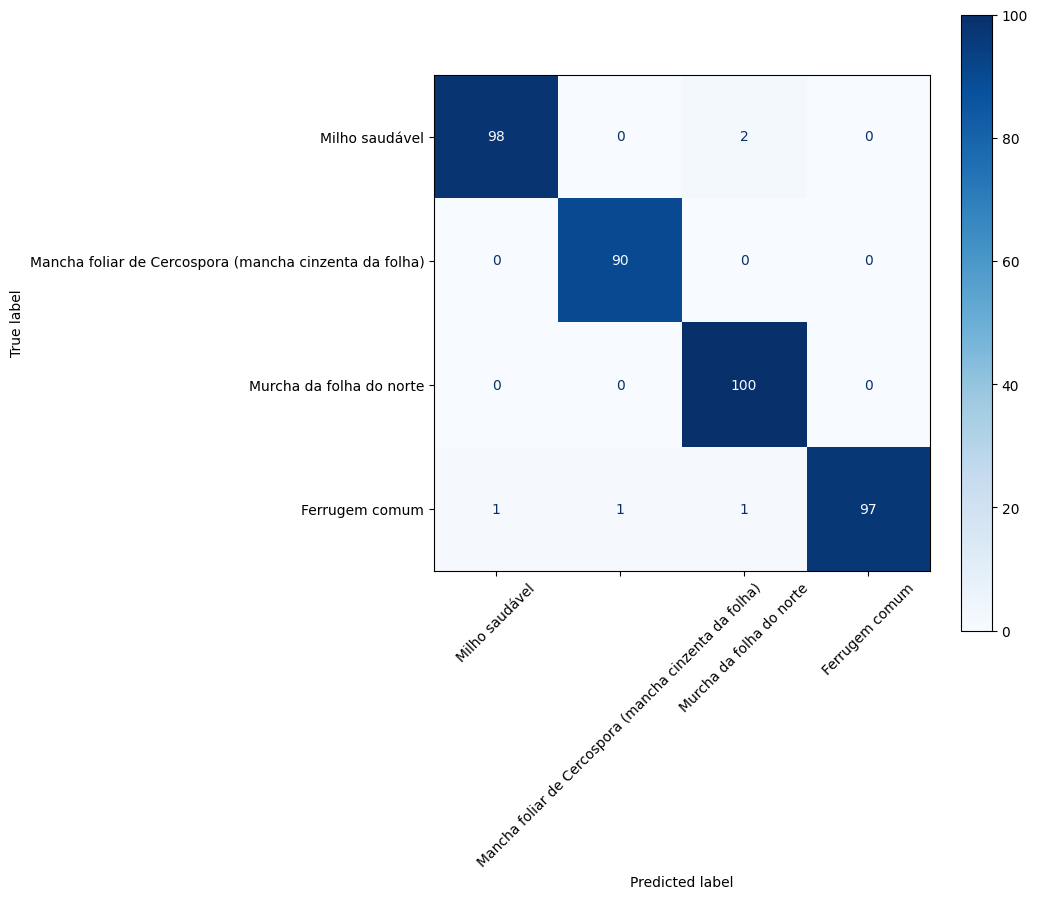

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Fazer previsões no conjunto de teste
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

# Nomes das classes traduzidos
translated_class_names = ['Milho saudável', 'Mancha foliar de Cercospora (mancha cinzenta da folha)',
                          'Murcha da folha do norte', 'Ferrugem comum']

# Verificar as classes presentes no conjunto de teste
unique_test_labels = np.unique(test_labels)
print(f'Classes presentes no conjunto de teste: {unique_test_labels}')

# Criar a máscara para destacar apenas a diagonal
mask = np.zeros_like(conf_matrix)
np.fill_diagonal(mask, 1)

# Configurar a exibição da matriz de confusão
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=[translated_class_names[i] for i in unique_test_labels])

# Plotar a matriz de confusão sem colorir
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='.0f')

# Rotacionar os labels do eixo x para 45 graus
plt.xticks(rotation=45)

# Aplicar a máscara para esconder os valores fora da diagonal
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i != j:
            ax.text(j, i, "", va='center', ha='center')

plt.show()


Plotando o desempenho do treinamento

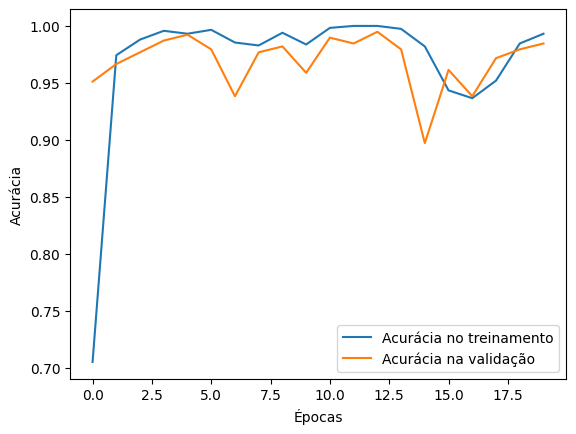

In [ ]:
# Plotar o desempenho
plt.plot(history.history['accuracy'], label='Acurácia no treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.show()

## Avaliando a precisão no conjunto de validação

In [ ]:
# Avaliar a precisão no conjunto de validação
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)
print(f'Acurácia no conjunto de validação: {val_acc * 100:.2f}%')

13/13 - 0s - 25ms/step - accuracy: 0.9846 - loss: 0.1006
Acurácia no conjunto de validação: 98.46%


In [ ]:
from sklearn.metrics import classification_report

# Fazer previsões no conjunto de teste
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerar o relatório de classificação
report = classification_report(test_labels, y_pred_classes, target_names=selected_classes)

# Exibir o relatório
print("Relatório de classificação por classe:")
print(report)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Relatório de classificação por classe:
                                            precision    recall  f1-score   support

                            Corn___healthy       0.99      0.98      0.98       100
Corn___Cercospora_leaf_spot Gray_leaf_spot       0.99      1.00      0.99        90
               Corn___Northern_Leaf_Blight       0.97      1.00      0.99       100
                        Corn___Common_rust       1.00      0.97      0.98       100

                                  accuracy                           0.99       390
                                 macro avg       0.99      0.99      0.99       390
                              weighted avg       0.99      0.99      0.99       390



In [ ]:
import os
import zipfile
import shutil

def save_images(images, labels, subset_name):
    # Criar uma pasta para o subconjunto
    base_path = f'/content/{subset_name}'
    if os.path.exists(base_path):
        shutil.rmtree(base_path)
    os.makedirs(base_path, exist_ok=True)

    # Criar pastas para cada classe dentro do subconjunto
    for label in np.unique(labels):
        class_path = os.path.join(base_path, translated_class_names[label])
        os.makedirs(class_path, exist_ok=True)

    # Salvar cada imagem na pasta da classe correspondente
    for i, (image, label) in enumerate(zip(images, labels)):
        class_path = os.path.join(base_path, translated_class_names[label])
        file_path = os.path.join(class_path, f'{subset_name}_image_{i}.png')
        plt.imsave(file_path, image.astype('uint8'))

    # Compactar a pasta do subconjunto
    zip_path = f'/content/{subset_name}.zip'
    with zipfile.ZipFile(zip_path, 'w') as zipf:
        for root, _, files in os.walk(base_path):
            for file in files:
                zipf.write(os.path.join(root, file),
                           os.path.relpath(os.path.join(root, file), base_path))

    # Remover a pasta temporária após a compactação
    shutil.rmtree(base_path)
    return zip_path

# Salvar e compactar os conjuntos de treino, validação e teste
train_zip = save_images(train_images, train_labels, 'train')
val_zip = save_images(val_images, val_labels, 'val')
test_zip = save_images(test_images, test_labels, 'test')

# Fazer o download dos arquivos compactados
from google.colab import files
files.download(train_zip)
files.download(val_zip)
files.download(test_zip)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>